In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [39]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [41]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [43]:
# Train the model with different kernels
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Evaluate models on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Print accuracies
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("Accuracy with Linear Kernel:", accuracy_linear)
print("Accuracy with Polynomial Kernel:", accuracy_poly)
print("Accuracy with RBF Kernel:", accuracy_rbf)



Accuracy with Linear Kernel: 1.0
Accuracy with Polynomial Kernel: 0.9777777777777777
Accuracy with RBF Kernel: 1.0


In [45]:
# Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)



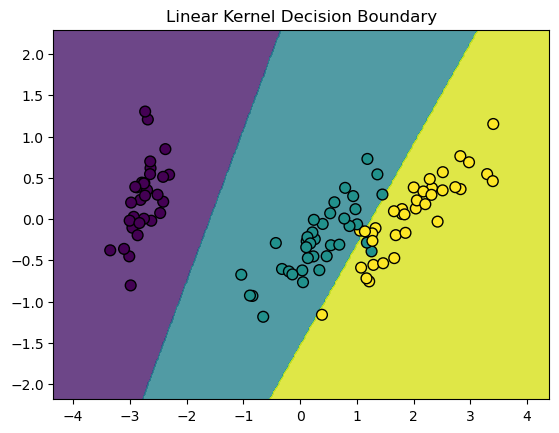

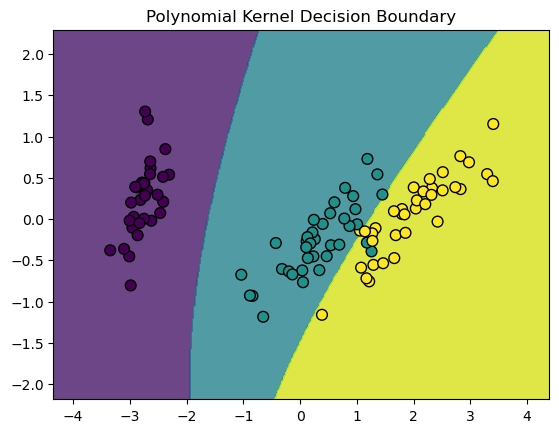

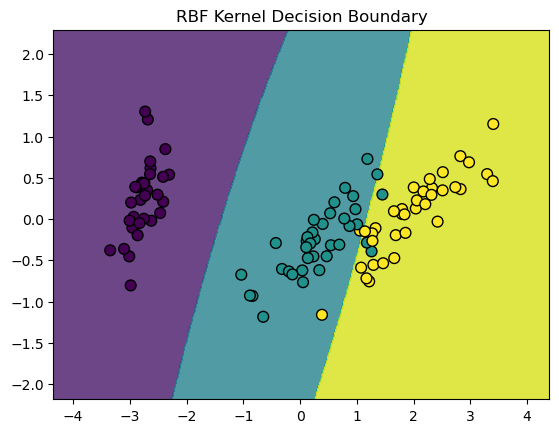

In [47]:
# Function to plot decision boundary
def plot_decision_boundary(X_train, y_train, model, title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Now we predict the labels for the grid points, but we need to project the grid points
    # into the 4D feature space before making predictions, so we use inverse_transform.
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_4d = pca.inverse_transform(grid_points)  # Transform 2D grid back to 4D

    Z = model.predict(grid_points_4d)  # Predict on the original 4D feature space
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=60)
    plt.title(title)
    plt.show()

# Visualize decision boundaries using PCA-reduced data (2D)
plot_decision_boundary(X_train_2d, y_train, svm_linear, "Linear Kernel Decision Boundary")
plot_decision_boundary(X_train_2d, y_train, svm_poly, "Polynomial Kernel Decision Boundary")
plot_decision_boundary(X_train_2d, y_train, svm_rbf, "RBF Kernel Decision Boundary")